### Data analysis




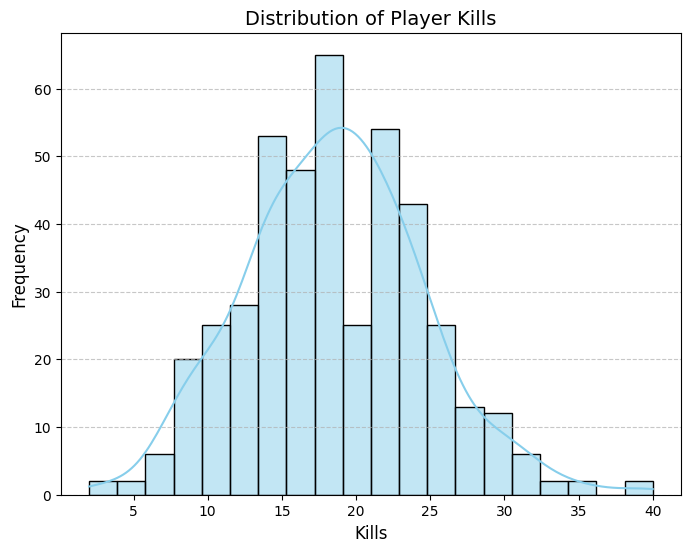

C:\Users\PC\AppData\Local\Temp\ipykernel_7536\1515514579.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_kills_by_map, y=avg_kills_by_map.index, palette='viridis')


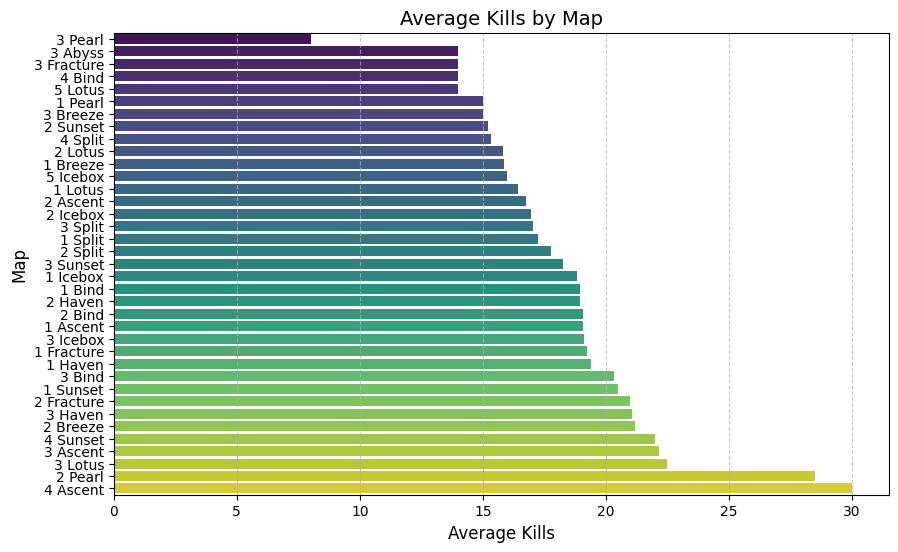

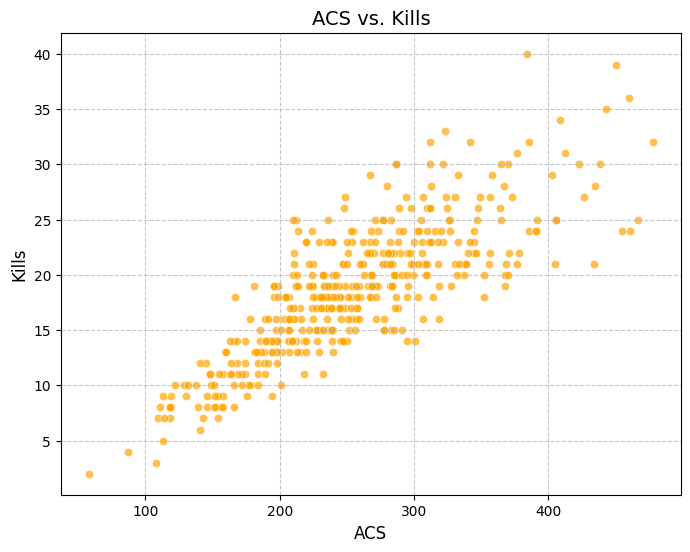

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'scraperOutput.csv'  # Replace with the actual file path if different
data = pd.read_csv(file_path)

# Preprocessing: Convert 'Deaths' and 'KAST' to numeric values if possible
data['Deaths'] = data['Deaths'].str.extract(r'(\d+)').astype(float)
data['KAST'] = data['KAST'].str.rstrip('%').astype(float)

# Visualization 1: Histogram of Player Kills
plt.figure(figsize=(8, 6))
sns.histplot(data['Kills'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Player Kills', fontsize=14)
plt.xlabel('Kills', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualization 2: Bar Plot of Average Kills by Map
plt.figure(figsize=(10, 6))
avg_kills_by_map = data.groupby('Map')['Kills'].mean().sort_values()
sns.barplot(x=avg_kills_by_map, y=avg_kills_by_map.index, palette='viridis')
plt.title('Average Kills by Map', fontsize=14)
plt.xlabel('Average Kills', fontsize=12)
plt.ylabel('Map', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Visualization 3: Scatter Plot of ACS vs. Kills
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['ACS'], y=data['Kills'], alpha=0.7, color='orange')
plt.title('ACS vs. Kills', fontsize=14)
plt.xlabel('ACS', fontsize=12)
plt.ylabel('Kills', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()



### Predicting using random forest regressor model

In [26]:
from model2 import buildLinearModel
from preprocessData import exponential_smoothing
from preprocessData import preprocess_data
from model import buildModel
import pandas as pd
import numpy

opposing_team = 'LOUD'

data = pd.read_csv('scraperOutput.csv')
newData = preprocess_data(data, opposing_team)

predictions, mse, r2 = buildModel(newData)

print("Random Forest Regressor Prediction:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean of Predictions: {predictions.mean():.4f}")

print("\n")
predictions1, mse1, r2_1 = buildLinearModel(data)

print(f"Mean of Predictions: ", predictions1.mean())



Random Forest Regressor Prediction:
Mean Squared Error: 1.8598
R² Score: 0.9507
Mean of Predictions: 18.1604


Linear Regression Model Evaluation:
Mean Squared Error: 0.7343
R² Score: 0.9805
Mean of Predictions:  18.18579084922604
